### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [22]:
import numpy as np # importing convention
m = np.arange(12).reshape((3,4))

print(m)

print ("Mean along the columns:", m.mean(axis=0))
print ("Mean along the rows:", m.mean(axis=1))
print ("Overall mean:", np.mean(m))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Mean along the columns: [4. 5. 6. 7.]
Mean along the rows: [1.5 5.5 9.5]
Overall mean: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [23]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print("With the outer() function:")
uv = np.outer(u,v)
print(uv,'\n')


np.array([(i*j) for i in u for j in v])
print("With a list comprehension:")
print (uv,'\n')
        

print("With numpy broadcasting operations:")
v= v[:,np.newaxis]
print(u*v)

With the outer() function:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

With a list comprehension:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

With numpy broadcasting operations:
[[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [24]:
import numpy.random as npr
npr.seed(103)#fixed seed for reproducible result
a = npr.rand(10,6)

for i in range(9):
    for j in range(5):
        if a[i,j]<0.1:
            a[i]=0
print(a)

[[0.43211121 0.17421526 0.17094369 0.82763225 0.58717126 0.45935375]
 [0.82268476 0.82154811 0.30712025 0.20089438 0.40323246 0.94788933]
 [0.         0.         0.         0.         0.         0.        ]
 [0.48605999 0.87828242 0.75490869 0.63046494 0.37648369 0.59016159]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.7027962  0.57953883 0.59921781 0.85726997 0.55116965 0.082344  ]
 [0.7334958  0.53385763 0.34208906 0.47161111 0.22157207 0.17647545]
 [0.47453603 0.36123724 0.82443977 0.14600013 0.81956916 0.18386897]]


In [25]:
#I didn't follow the hint written above, i hope is equally correct

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

Every 10th element: 
 [0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]
The reverse array: 
 [6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319

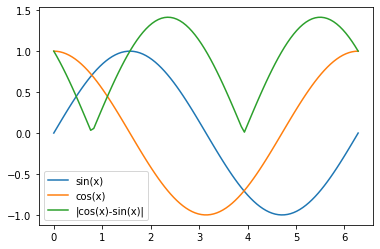

In [26]:
from math import sin,cos,pi
import numpy as np
import matplotlib.pyplot as plt
a=np.linspace(0, 2*pi, 100)# start, end, num-points (to be used for plotting f(x))

#Extract every 10th element using slice notation
m = a[0:100:10]
print("Every 10th element:",'\n',m)

#Reverse the array using slice notation
m1 = a[::-1]
print("The reverse array:",'\n',m1)

#Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
m2 = [i for i in a[0:100] if abs(cos(i)-sin(i)) <0.1]
print("The elements that make the difference <0.1:",'\n',m2)

#Make a plot showing the sin and cos functions and indicate where they are close
%matplotlib inline 
xs = np.linspace(0, 2*np.pi, 100)
ys1 = np.sin(xs) # np.sin is a universal function
ys2 = np.cos(xs)
plt.plot(xs, ys1,label="sin(x)");
plt.plot(xs, ys2,label="cos(x)");
plt.plot(xs, abs(ys1-ys2),label="|cos(x)-sin(x)|")#to show where the difference is <0.1
plt.legend()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [27]:
print("10x10 table:")
a = np.fromfunction(lambda i, j: (i*j), (11,11))
a_row = np.delete(a, 0, 0)#delete 0 row
a_col = np.delete(a_row,0,1)#deletes 0 columns
a = a_col
print (a,'\n')

#Find the trace of the matrix
sum=0
for i in range(10):
    for j in range(10):
        if i == j:
            sum +=a[i,j]
print("The matrix trace is:",sum,'\n')

#Extract the anto-diagonal (this should be array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10]))
def anti_diagonal(arr):#i used the function fliplr hope is correct
    return np.fliplr(arr).diagonal()
print("anti diagonal:",anti_diagonal(a),'\n')

#Extract the diagnoal offset by 1 upwards (this should be array([ 2,  6, 12, 20, 30, 42, 56, 72, 90]))
print("The diagonal offset by 1 upwards is:")
print(a[(0,1,2,3,4,5,6,7,8),(1,2,3,4,5,6,7,8,9)])

10x10 table:
[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]] 

The matrix trace is: 385.0 

anti diagonal: [10. 18. 24. 28. 30. 30. 28. 24. 18. 10.] 

The diagonal offset by 1 upwards is:
[ 2.  6. 12. 20. 30. 42. 56. 72. 90.]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [28]:
#Construct a 2D grid of distances among each city along Route 66
x = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
y = x[:,np.newaxis]
print("The 2D grid of distances:")
print(x+y)

#Convert that in km (THOSE SAVAGES...)
c = np.array(1.60934*(x+y))
print("Converted in Km:")
print(c.astype(int))#convert to int from float

The 2D grid of distances:
[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198  396  501  934 1069 1373 1673 1742 2111 2646]
 [ 303  501  606 1039 1174 1478 1778 1847 2216 2751]
 [ 736  934 1039 1472 1607 1911 2211 2280 2649 3184]
 [ 871 1069 1174 1607 1742 2046 2346 2415 2784 3319]
 [1175 1373 1478 1911 2046 2350 2650 2719 3088 3623]
 [1475 1673 1778 2211 2346 2650 2950 3019 3388 3923]
 [1544 1742 1847 2280 2415 2719 3019 3088 3457 3992]
 [1913 2111 2216 2649 2784 3088 3388 3457 3826 4361]
 [2448 2646 2751 3184 3319 3623 3923 3992 4361 4896]]
Converted in Km:
[[   0  318  487 1184 1401 1890 2373 2484 3078 3939]
 [ 318  637  806 1503 1720 2209 2692 2803 3397 4258]
 [ 487  806  975 1672 1889 2378 2861 2972 3566 4427]
 [1184 1503 1672 2368 2586 3075 3558 3669 4263 5124]
 [1401 1720 1889 2586 2803 3292 3775 3886 4480 5341]
 [1890 2209 2378 3075 3292 3781 4264 4375 4969 5830]
 [2373 2692 2861 3558 3775 4264 4747 4858 5452 6313]
 [2484 2803 2972 3669 3886 4375 4858 4969 5563 6424]
 [

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [1]:
#----------------------------ATTENTION -------------READ----------------------------------------------
#For the exercise 7 it is needed to restart the kernel and then run the program,                     |
#beacause it is giving an error for the 'index' float type (probably related to the exercises above) |
#-----------------------------------------------------------------------------------------------------

In [40]:
import time
import numpy as np
start_time = time.time()
N=99
nums = np.arange(0,N+1)

#Constract a shape (100,) boolean array, the mask
mask = np.full(N+1, False, dtype=bool)

#Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
index = [i for i in range(len(nums)) if sum([nums[i]%val==0 for val in range(2,nums[i]-1)])==0]
         
for j in range(2,len(index)):
    for i in range(2,100):
        if index[j] == nums[i]:
            mask[i] = True

#Apply the mask to obtain an array of ordered prime numbers
print("The prime numbers from 0 to",N,"are:",'\n',nums[mask],'\n')

#Check the performances (timeit); how does it scale with N?
time = time.time()-start_time
print("The simulation runs in:",'\n',time,'\n')

#Implement the optimization suggested in the sieve of Eratosthenes
list1=[]
def SieveOfEratosthenes(n): 
    prime = [True for i in range(n+1)] 
    p = 2
    while (p * p <= n): 
        if (prime[p] == True): 
            for i in range(p * p, n+1, p): 
                prime[i] = False
        p += 1
    for p in range(2, n+1): 
        if prime[p]: 
            list1.append(p)
    return 
SieveOfEratosthenes(N)
print("With the list1 sieve of Eratosthenes implementation:",list1)

The prime numbers from 0 to 99 are: 
 [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97] 

The simulation runs in: 
 0.04026603698730469 

With the list1 sieve of Eratosthenes implementation: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [ ]:
#instead of using randint i used random.choiche([-1,1])

The matrix related to the random walking distance is:
[[  0.   1.   2. ...  -7.  -8.  -9.]
 [  0.  -1.   0. ...  -7.  -8.  -7.]
 [  0.  -1.   0. ... -13. -14. -13.]
 ...
 [  0.   1.   2. ... -15. -16. -15.]
 [  0.  -1.   0. ...   7.   8.   9.]
 [  0.  -1.   0. ... -15. -16. -15.]]
The actual walking distance for each walker:
[[0.000e+00 1.000e+00 3.000e+00 ... 6.390e+02 6.470e+02 6.560e+02]
 [0.000e+00 1.000e+00 1.000e+00 ... 1.163e+03 1.171e+03 1.178e+03]
 [0.000e+00 1.000e+00 1.000e+00 ... 1.439e+03 1.453e+03 1.466e+03]
 ...
 [0.000e+00 1.000e+00 3.000e+00 ... 1.543e+03 1.559e+03 1.574e+03]
 [0.000e+00 1.000e+00 1.000e+00 ... 2.161e+03 2.169e+03 2.178e+03]
 [0.000e+00 1.000e+00 1.000e+00 ... 1.965e+03 1.981e+03 1.996e+03]]
The squared matrix:
[[0.000000e+00 1.000000e+00 9.000000e+00 ... 4.083210e+05 4.186090e+05
  4.303360e+05]
 [0.000000e+00 1.000000e+00 1.000000e+00 ... 1.352569e+06 1.371241e+06
  1.387684e+06]
 [0.000000e+00 1.000000e+00 1.000000e+00 ... 2.070721e+06 2.111209e+06


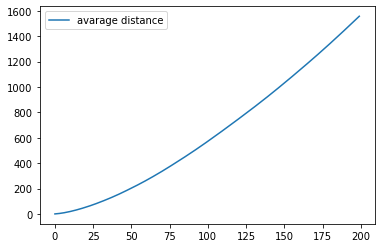

In [82]:
from math import sqrt
import numpy as np
import random
import matplotlib.pyplot as plt
#Take 1000 walkers and let them walk for 200 steps
n_walkers= 1000
steps = 200

#Use randint to create a 2D array of size walkers x steps with values -1 or 1
matrix = np.zeros((n_walkers,steps))

for i in range(n_walkers):
    matrix[i][0]==0
    matrix[i][1]= 2*np.random.randint(0,2)-1

for i in range(n_walkers):
    for j in range(1,steps):
        n = 2*np.random.randint(0,2)-1
        walk = matrix[i][j-1]
        matrix[i][j] = (n + walk )
   
print("The matrix related to the random walking distance is:")    
print(matrix)    

#Build the actual walking distances for each walker
dist = matrix.cumsum(axis=1)
print("The actual walking distance for each walker:")
print(abs(dist))

#Take the square of that 2D array (elementwise)
dist = dist**2
print("The squared matrix:")
print(dist)

#Compute the mean of the squared distances at each step
square_distance = dist.mean(axis=0)
print("The mean of the squared distances:")
print(square_distance)

#Plot the average distances (sqrt(distance**2)) as a function of time(step)
time = [i for i in range(steps)]
av_mean = [sqrt(i) for i in square_distance]

%matplotlib inline 
plt.plot(time, av_mean,label="avarage distance");
plt.legend()
plt.show()

In [ ]:
#Beacuse it is a diffusion process i expected to find a function of time proportional to sqrt(t)
#Insted it seems pretty linear (hope the code is correct)

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

[[ 1900 30000  4000 48300]
 [ 1901 47200  6100 48200]
 [ 1902 70200  9800 41500]
 [ 1903 77400 35200 38200]
 [ 1904 36300 59400 40600]
 [ 1905 20600 41700 39800]
 [ 1906 18100 19000 38600]
 [ 1907 21400 13000 42300]
 [ 1908 22000  8300 44500]
 [ 1909 25400  9100 42100]
 [ 1910 27100  7400 46000]
 [ 1911 40300  8000 46800]
 [ 1912 57000 12300 43800]
 [ 1913 76600 19500 40900]
 [ 1914 52300 45700 39400]
 [ 1915 19500 51100 39000]
 [ 1916 11200 29700 36700]
 [ 1917  7600 15800 41800]
 [ 1918 14600  9700 43300]
 [ 1919 16200 10100 41300]
 [ 1920 24700  8600 47300]] 



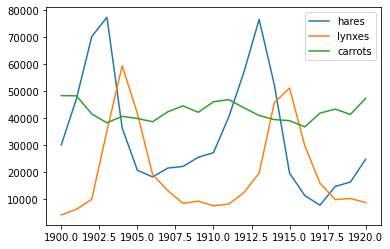

For example for the class 'hares' the main statistical properties are:
mean 34080.95238095238
std 20897.906458089667
median 25400.0
sum 715700
The correlation between lynxes and carrots: -0.6805771698401617
The other two correlations (using the correlation matrix):
[[1.         0.07189206]
 [0.07189206 1.        ]] 
 [[ 1.         -0.01660378]
 [-0.01660378  1.        ]]
The relative species with the max population every year:
['carrots', 'carrots', 'hares', 'carrots', 'hares', 'carrots', 'lynxes', 'lynxes', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots', 'hares', 'carrots', 'hares', 'carrots', 'hares', 'carrots', 'lynxes', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots']


In [4]:
import matplotlib.pyplot as plt
import numpy as np

#Check the content by looking within the file
f = open('populations.txt','r')
file_contents = f.read()

#Load the data into a 2D array
array2d = np.loadtxt('populations.txt').astype('int')
print(array2d,'\n')

#Create arrays out of the columns, the arrays being (in order): year, hares, lynxes, carrots
year = np.array([array2d[i][0] for i in range(21)])
hares = np.array([array2d[i][1] for i in range(21)])
lynxes = np.array([array2d[i][2] for i in range(21)])
carrots = np.array([array2d[i][3] for i in range(21)])

#Plot the 3 populations over the years
xs = year
plt.plot(xs, hares,label="hares");
plt.plot(xs, lynxes, label="lynxes");
plt.plot(xs, carrots, label="carrots")
plt.legend()
plt.show()

#Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
print("For example for the class 'hares' the main statistical properties are:")
for function in ['mean','std','median','sum']:
    print(function, getattr(np, function)(hares))
    
r1 = np.corrcoef(lynxes, hares)
r2 = np.corrcoef(carrots, hares)

print("The correlation between lynxes and carrots:",np.corrcoef(lynxes, carrots )[0,1])
print("The other two correlations (using the correlation matrix):")
print(r1,'\n',r2)

#Which species has the highest population each year?
print("The relative species with the max population every year:")
maximum = array2d.max(axis=1)
name = []       
for i in range(len(maximum)):
    if maximum[i] == hares[i]:
        name.append("hares")
    if maximum[i] == lynxes[i]:
        name.append("lynxes")
    else:
        name.append("carrots")
print(name)